# Figure 4: Distribution of extinction times

Generate **figures/hist.pdf** and calculate summary statistics for meltdown
under default mutational parameters.

In [1]:
from doomed import *

/Users/rbazev/Documents/GitHub/doomed/python/doomed.py:34: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']


### Expected extinction time

In [2]:
# Default parameters
u = 0.02
s = 0.07
Z0 = List([1000])

In [18]:
m, v = extinction_time(Z0, 15, s, u, 1e-8)
sd = np.sqrt(v)
print('Expected value:', round(m, 3))
print('      Variance:', round(v, 3))
print('  Standard dev:', round(sd, 3))
print('        CV (%):', round(100 * sd / m, 2))

Expected value: 214.946
      Variance: 3913.577
  Standard dev: 62.559
        CV (%): 29.1


### Expected time of first click

In [19]:
m2, v2 = click_time(1000, 0, s, u, 1e-8)
sd2 = np.sqrt(v2)
print('Expected value:', round(m2, 3), '   ', round(m2/m * 100, 1), '%')
print('      Variance:', round(v2, 3))
print('  Standard dev:', round(sd2, 3))
print('            CV:', round(sd2 / m2, 2))

Expected value: 209.197     97.3 %
      Variance: 3913.453
  Standard dev: 62.558
            CV: 0.3


### Expected population size at extinction time

In [5]:
ENt(Z0, 214.946, s, u)

17.37934060345936

### Time required for expected population size to drop below 1

Checking approach proposed by Lansch-Justen et al. (2022).

Estimate: 357 generations.

In [7]:
for n in range(354, 360):
    print(n, ENt(Z0, n, s, u))

354 1.0470900803628642
355 1.0261482787557525
356 1.005625313180771
357 0.9855128069172763
358 0.9658025507790412
359 0.9464864997635613


In [15]:
m + 2 * sd

352.5752841203255

### Probability that a population is extinct at that time 

In [6]:
prob_extinct(Z0, 357, 50, s, u)

0.969686688321009

### Probability density

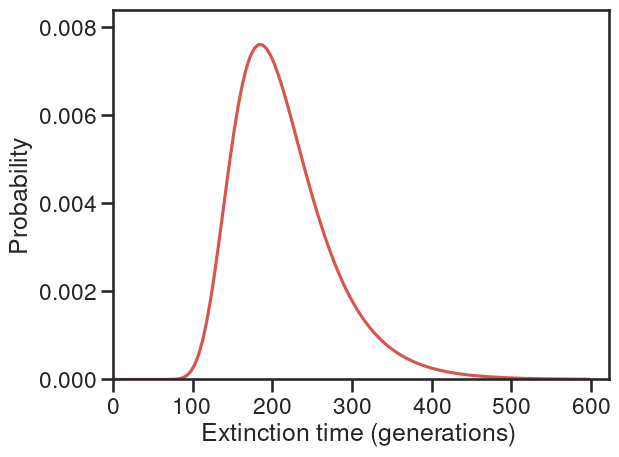

In [25]:
red = sns.xkcd_rgb["pale red"]
theoryT = []
theoryP = []
binw = 5
t1 = 0
p1 = 0
for i in range(1, 121):
    t2 = i * binw
    p2 = prob_extinct(Z0, t2, 15, s, u)
    theoryT.append((t1+t2)/2)
    theoryP.append((p2-p1) / binw)
    t1 = t2
    p1 = p2
plt.plot(theoryT, theoryP, color=red)
plt.xlim(0, 623)
plt.ylim(0, .0084)
plt.ylabel('Probability')
plt.xlabel('Extinction time (generations)');

### Stochastic simulations

You can skip directly to the "Load data" section below.

In [12]:
np.random.seed(6232023)
tt = []
for i in range(10000):
    tmpN, tmpZ, t = to_extinction(Z0, s, u)
    tt.append(t)
t = np.array(tt)
t.mean(), t.var(ddof=1), len(t)

(215.0605, 4147.163556105611, 10000)

### Save data

Save extinction times.

In [13]:
with open('../data/hist.npy', 'wb') as f:
    np.save(f, t)

### Load data

Extinction times can be retrieved directly.

In [26]:
t = np.load('../data/hist.npy')
t.mean(), t.var(ddof=1), len(t)

(215.0605, 4147.163556105611, 10000)

In [27]:
t.min(), t.max()

(82, 828)

In [28]:
# we ignore the few times > 600 (for plotting purposes)
t[t>600]

array([613, 665, 828, 734, 653, 704])

In [29]:
bins = np.arange(80, 601, 10)
bins

array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
       210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330,
       340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460,
       470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590,
       600])

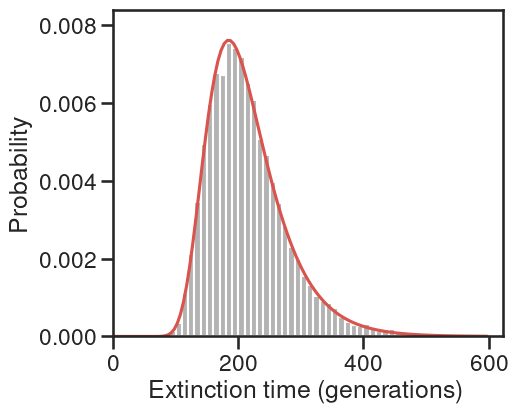

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_position([.212, .175, .78, .817])
ax.hist(t[t<600], bins=bins, density=True, color='0.7')
ax.plot(theoryT, theoryP, color=red)
ax.set_xlim(0, 623)
ax.set_ylim(0, .0084)
ax.set_ylabel('Probability')
ax.set_xlabel('Extinction time (generations)')
fig.savefig('../figures/hist.pdf');